In [52]:

from common.llm import get_llm

In [53]:
llm = get_llm()

In [54]:
from agents.fetch import get_agent
agent = get_agent(llm=llm)

In [39]:
agent.name

'jira_agent'

In [55]:
from agents.supervisor import get_supervisor

In [56]:
graph = get_supervisor(llm=llm)

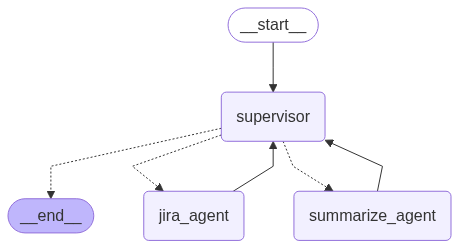

In [42]:
graph

In [57]:
from langchain_core.messages import HumanMessage
response = graph.invoke( {
    "messages": HumanMessage(content='Fetch all defects from project Learning Management System')
})
    

Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


In [58]:
response

{'messages': [HumanMessage(content='Fetch all defects from project Learning Management System', additional_kwargs={}, response_metadata={}, id='1ca59fc3-ab8e-4792-a6b1-ddd5a822c13f'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'transfer_to_jira_agent', 'arguments': '{}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 105, 'candidates_token_count': 7, 'total_token_count': 172, 'prompt_tokens_details': [{'modality': 1, 'token_count': 105}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 7}], 'thoughts_token_count': 60, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -1.1963999611990792, 'model_name': 'gemini-2.5-flash'}, name='supervisor', id='run--fede3747-7ca1-44db-bade-354604764e1b-0', tool_calls=[{'name': 'transfer_to_jira_agent', 'args': {}, 'id': '1fbbefa2-46c1-47ab-b77a-59c99d9c9131', 'type': 'tool_call'}], usage_metadata={'input_

In [59]:
for message in response['messages']:
    message.pretty_print()

================================ Human Message =================================

Fetch all defects from project Learning Management System
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_jira_agent (1fbbefa2-46c1-47ab-b77a-59c99d9c9131)
 Call ID: 1fbbefa2-46c1-47ab-b77a-59c99d9c9131
  Args:
================================= Tool Message =================================
Name: transfer_to_jira_agent

Successfully transferred to jira_agent
================================== Ai Message ==================================
Name: jira_agent
Tool Calls:
  jql_query (d507dfc5-d030-4a7a-ba69-b9c74e689328)
 Call ID: d507dfc5-d030-4a7a-ba69-b9c74e689328
  Args:
    instructions: project = "Learning Management System" AND issuetype = Bug
================================= Tool Message =================================
Name: jql_query

Found 2 issues:
[{'key': 'SCRUM-17', 'summary': 'The home page is taking too much time to 

In [50]:
from agents.summarize import get_agent
summarizer = get_agent(llm=llm)
response = summarizer.invoke({
    "messages": HumanMessage(
        content="Send email to qt@qt.com with subject test and message is test"
    )
})

In [51]:
response['messages']

[HumanMessage(content='Send email to qt@qt.com with subject test and message is test', additional_kwargs={}, response_metadata={}, id='74252a07-2aff-444e-ad75-c3fb96354cb8'),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'email_sender', 'arguments': '{"message": "test", "to": "qt@qt.com", "subject": "test"}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 63, 'candidates_token_count': 13, 'total_token_count': 142, 'prompt_tokens_details': [{'modality': 1, 'token_count': 63}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 13}], 'thoughts_token_count': 66, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.7619088246272161, 'model_name': 'gemini-2.5-flash'}, name='summarize_agent', id='run--bd4e09cf-47b5-404e-a380-3a82bfc599a1-0', tool_calls=[{'name': 'email_sender', 'args': {'message': 'test', 'to': 'qt@qt.com', 'subject': 'test'}, 'id': '